Libraries

In [1]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import urllib.request as req
import json
import time
import pandas as pd
from pytz import timezone
import matplotlib.pyplot as plt

data_folder = '../../../data/sao-paulo/training-sets/'

Collecting for all months

In [2]:
def for_each_month(fn):
    start_date = dt.datetime(2018, 7, 1)
    end_of_all = dt.datetime(2019, 2, 1)
    while start_date < end_of_all:
        next_month = start_date + relativedelta(months=1)
        end_date = next_month - relativedelta(days=1)
        fn(start_date, end_date)
        start_date = next_month
        
@for_each_month
def print_interval(start_date, end_date):
    print(start_date, 'to', end_date)

2018-07-01 00:00:00 to 2018-07-31 00:00:00
2018-08-01 00:00:00 to 2018-08-31 00:00:00
2018-09-01 00:00:00 to 2018-09-30 00:00:00
2018-10-01 00:00:00 to 2018-10-31 00:00:00
2018-11-01 00:00:00 to 2018-11-30 00:00:00
2018-12-01 00:00:00 to 2018-12-31 00:00:00
2019-01-01 00:00:00 to 2019-01-31 00:00:00


In [3]:
@for_each_month
def collect(start_date, end_date):
    url = 'https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json' + \
          '?apiKey=6532d6454b8aa370768e63d6ba5a832e' + \
          '&startDate=' + start_date.strftime("%Y%m%d") + \
          '&endDate=' + end_date.strftime("%Y%m%d") + \
          '&units=m'
    print(url)
    response = req.urlopen(url)
    with open(data_folder + 'weather/weather-' + start_date.strftime("%Y%m") +  '.json', 'w') as f:
        for line in response:
            f.write(line.decode())
    time.sleep(0.5)

https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180701&endDate=20180731&units=m
https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180801&endDate=20180831&units=m
https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180901&endDate=20180930&units=m
https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20181001&endDate=20181031&units=m
https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20181101&endDate=20181130&units=m
https://api.weather.com/v1/geocode/-23.5489/-46.6388/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20181201&endDate=20181231&units=m
http

Testing a collected file

In [4]:
with open(data_folder + 'weather/weather-201812.json') as f:
    text = f.read()

data = json.loads(text)
df = pd.DataFrame(data['observations'])
print(len(df), 'observations')
df.head()

512 observations


blunt_phrase        class clds day_ind  dewPt  expire_time_gmt  feels_like  \
0         None  observation  SCT       D     17       1543658400          20   
1         None  observation  OVC       D     18       1543662000          20   
2         None  observation  CLR       D     18       1543665600          20   
3         None  observation  SCT       D     17       1543669200          21   
4         None  observation  FEW       D     18       1543672800          22   

   gust  heat_index  icon_extd  ... uv_index valid_time_gmt vis water_temp  \
0   NaN          20       1201  ...        0     1543651200   9       None   
1   NaN          20       1201  ...        0     1543654800   9       None   
2   NaN          20       1201  ...        1     1543658400   9       None   
3   NaN          21       3000  ...        3     1543662000   9       None   
4   NaN          22       3400  ...        6     1543665600   9       None   

     wc   wdir wdir_cardinal  wspd wx_icon      wx_phrase  
0  20.0  290.0           WNW   9.0      11     Light Rain  
1  20.0  300.0           WNW  11.0      11     Light Rain  
2  20.0    NaN          CALM   0.0      11     Light Rain  
3  21.0  350.0             N   7.0      30  Partly Cloudy  
4  22.0  330.0           NNW  11.0      34           Fair  

[5 rows x 45 columns]

Loading all data into a dataframe

In [5]:
df_list = []

@for_each_month
def mount_df(start_date, _):
    print(start_date)
    fname = data_folder + 'weather/weather-' + start_date.strftime("%Y%m") + '.json'
    with open(fname) as f:
        text = f.read()
    data = json.loads(text)
    df_list.append(pd.DataFrame(data['observations']))
    
weather_raw = pd.concat(df_list).reset_index(drop=True)
print(len(weather_raw), 'observations')
weather_raw.head()

2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
3576 observations


blunt_phrase        class clds day_ind  dewPt  expire_time_gmt  feels_like  \
0         None  observation  CLR       N     12       1530442800          13   
1         None  observation  CLR       D     12       1530446400          13   
2         None  observation  CLR       D     12       1530450000          13   
3         None  observation  CLR       D     13       1530453600          18   
4         None  observation  CLR       D     13       1530457200          19   

   gust  heat_index  icon_extd  ... uv_index valid_time_gmt  vis water_temp  \
0  None          13       2000  ...        0     1530435600  2.0       None   
1  None          13       2000  ...        0     1530439200  2.0       None   
2  None          13       2000  ...        0     1530442800  4.0       None   
3  None          18       2100  ...        2     1530446400  4.0       None   
4  None          19       2100  ...        3     1530450000  4.0       None   

     wc   wdir wdir_cardinal  wspd wx_icon wx_phrase  
0  13.0  110.0           ESE   2.0      20       Fog  
1  13.0    NaN          CALM   0.0      20       Fog  
2  13.0  120.0           ESE   4.0      20       Fog  
3  18.0    NaN          CALM   0.0      21      Haze  
4  19.0   90.0             E   7.0      21      Haze  

[5 rows x 45 columns]

Boston times

In [6]:
def convert(gmt_time):
    gmt_time = dt.datetime.utcfromtimestamp(gmt_time)
    gmt_time = timezone('UTC').localize(gmt_time)
    boston_time = gmt_time.astimezone(timezone('US/Eastern'))
    return boston_time.replace(tzinfo=None)

weather_raw['valid_time_boston'] = weather_raw['valid_time_gmt'].apply(convert)
print('Min date:', weather_raw['valid_time_boston'].min())
print('Max date:', weather_raw['valid_time_boston'].max())
weather_raw['valid_time_boston'].head(10)

Min date: 2018-07-01 05:00:00
Max date: 2019-01-31 20:00:00


0   2018-07-01 05:00:00
1   2018-07-01 06:00:00
2   2018-07-01 07:00:00
3   2018-07-01 08:00:00
4   2018-07-01 09:00:00
5   2018-07-01 10:00:00
6   2018-07-01 11:00:00
7   2018-07-01 12:00:00
8   2018-07-01 13:00:00
9   2018-07-01 14:00:00
Name: valid_time_boston, dtype: datetime64[ns]

In [7]:
weather_raw.columns

Index(['blunt_phrase', 'class', 'clds', 'day_ind', 'dewPt', 'expire_time_gmt',
       'feels_like', 'gust', 'heat_index', 'icon_extd', 'key', 'max_temp',
       'min_temp', 'obs_id', 'obs_name', 'precip_hrly', 'precip_total',
       'pressure', 'pressure_desc', 'pressure_tend', 'primary_swell_direction',
       'primary_swell_height', 'primary_swell_period', 'primary_wave_height',
       'primary_wave_period', 'qualifier', 'qualifier_svrty', 'rh',
       'secondary_swell_direction', 'secondary_swell_height',
       'secondary_swell_period', 'snow_hrly', 'temp', 'terse_phrase',
       'uv_desc', 'uv_index', 'valid_time_gmt', 'vis', 'water_temp', 'wc',
       'wdir', 'wdir_cardinal', 'wspd', 'wx_icon', 'wx_phrase',
       'valid_time_boston'],
      dtype='object')

According to available in hourly forecast (for new predictions)
* Selecting the most indicative numeric variables

In [14]:
# no precipitation data available... :(
consider_only = [
    'dewPt', 'feels_like', 'heat_index', #'precip_total',
    'rh', 'temp', 'vis', 'wc', 'wspd'
]

In [15]:
for i in consider_only:
    print('---', i)
    print(weather_raw[i].value_counts().head(5))
    print()

--- dewPt
17    419
18    389
16    355
12    342
13    315
Name: dewPt, dtype: int64

--- feels_like
20    309
21    276
26    269
22    265
19    262
Name: feels_like, dtype: int64

--- heat_index
20    309
21    276
26    269
22    265
19    262
Name: heat_index, dtype: int64

--- rh
83    326
78    294
88    280
73    243
82    233
Name: rh, dtype: int64

--- temp
20    309
21    276
22    265
19    262
18    260
Name: temp, dtype: int64

--- vis
9.0    2539
8.0     333
7.0     216
5.0     186
6.0     178
Name: vis, dtype: int64

--- wc
20.0    309
21.0    275
22.0    265
19.0    262
18.0    260
Name: wc, dtype: int64

--- wspd
11.0    459
13.0    416
9.0     408
7.0     395
15.0    346
Name: wspd, dtype: int64



Null values

In [16]:
for i in consider_only:
    print('---', i)
    print(weather_raw[i].isnull().value_counts())
    print()

--- dewPt
False    3576
Name: dewPt, dtype: int64

--- feels_like
False    3576
Name: feels_like, dtype: int64

--- heat_index
False    3576
Name: heat_index, dtype: int64

--- rh
False    3576
Name: rh, dtype: int64

--- temp
False    3576
Name: temp, dtype: int64

--- vis
False    3576
Name: vis, dtype: int64

--- wc
False    3571
True        5
Name: wc, dtype: int64

--- wspd
False    3571
True        5
Name: wspd, dtype: int64



Evolution

--- dewPt
Min: -1
Max: 23


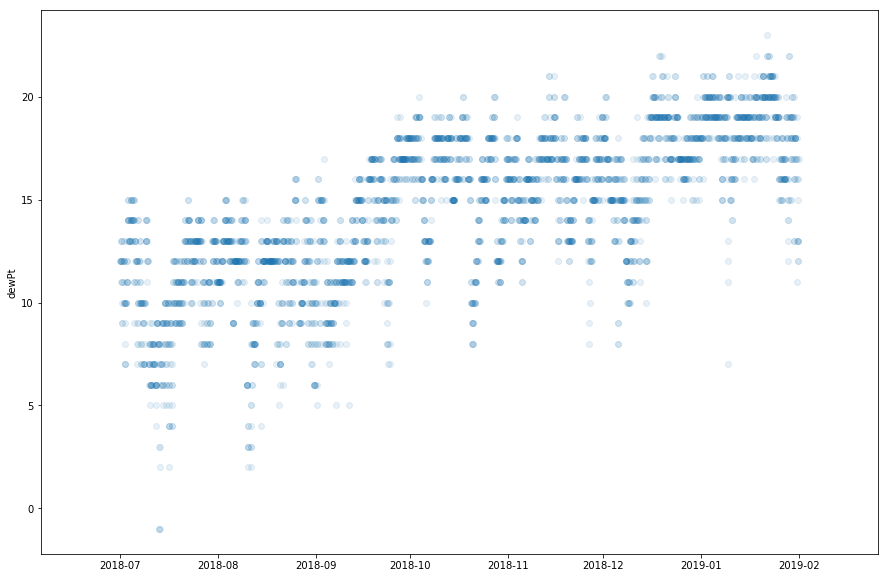

--- feels_like
Min: 7
Max: 34


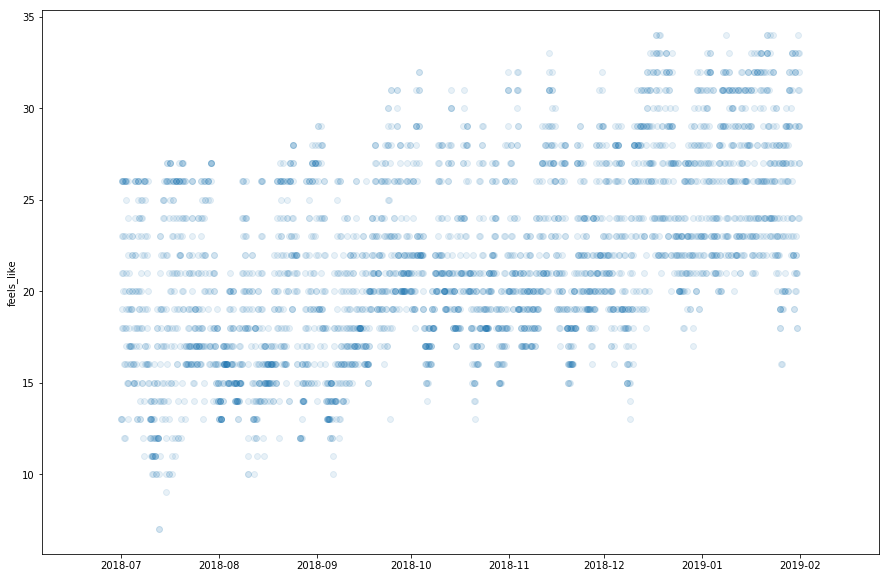

--- heat_index
Min: 9
Max: 34


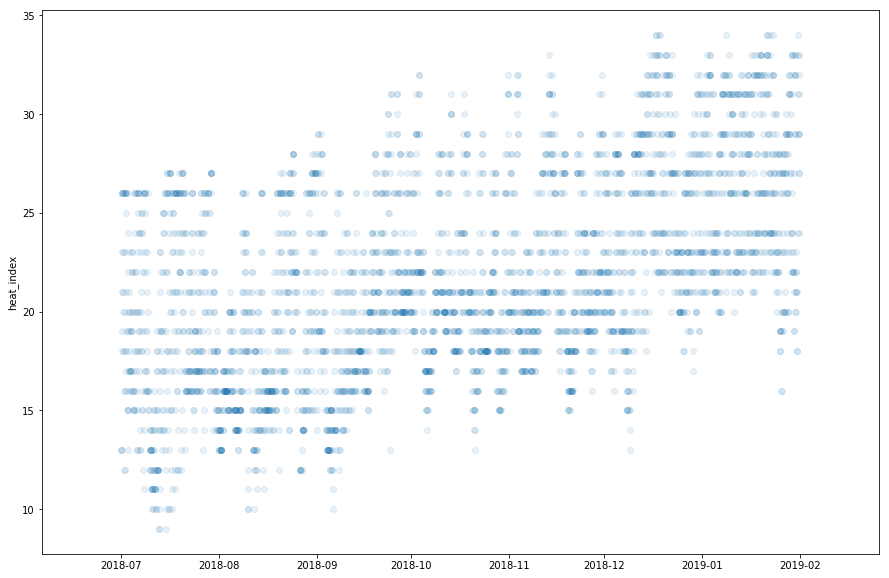

--- rh
Min: 19
Max: 94


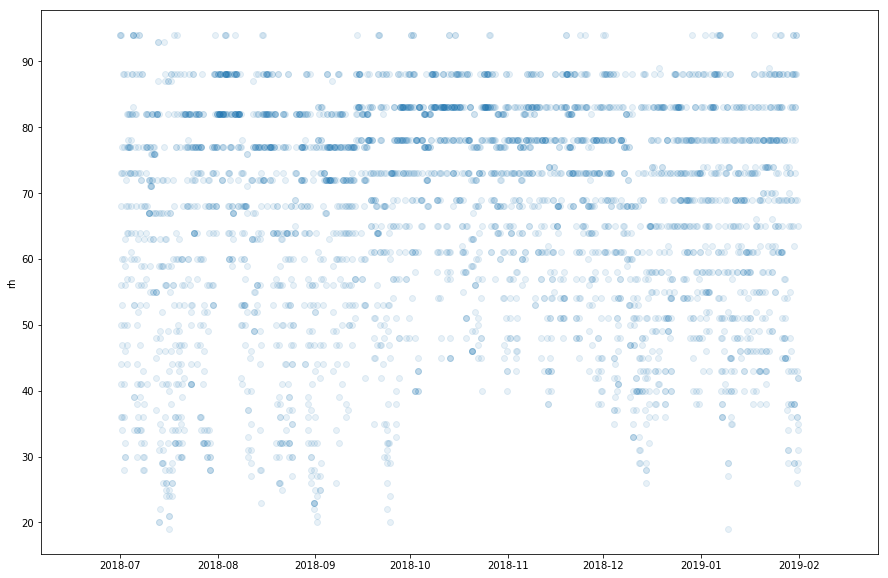

--- temp
Min: 9
Max: 34


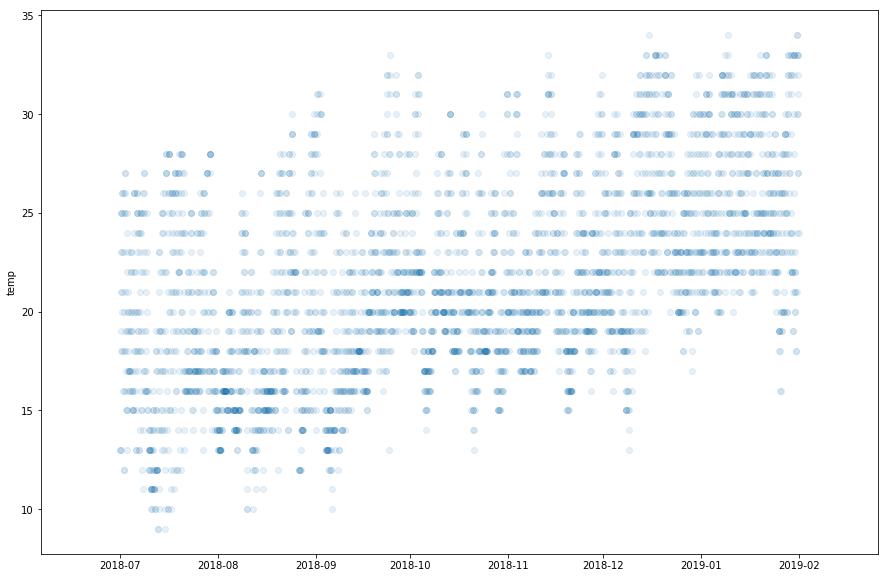

--- vis
Min: 0.31
Max: 9.0


--- wc
Min: 7.0
Max: 34.0


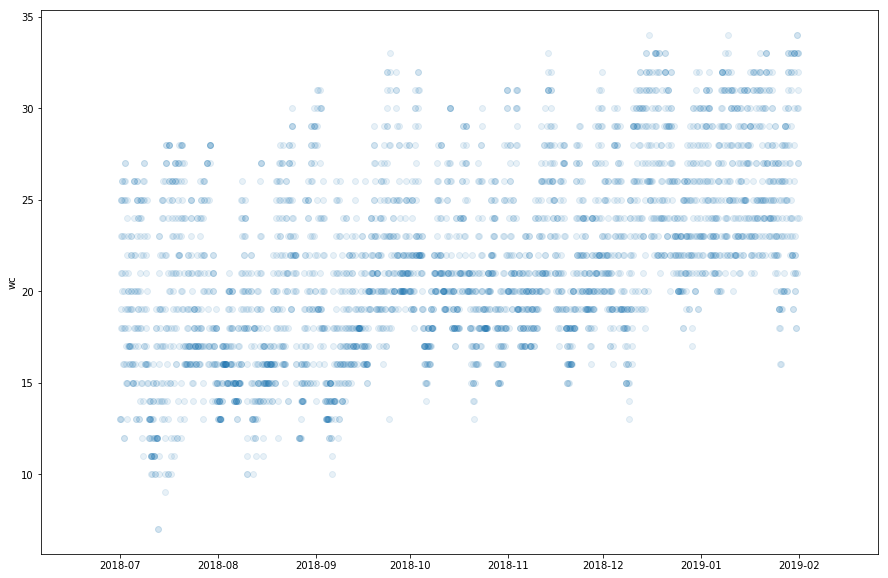

--- wspd
Min: 0.0
Max: 39.0


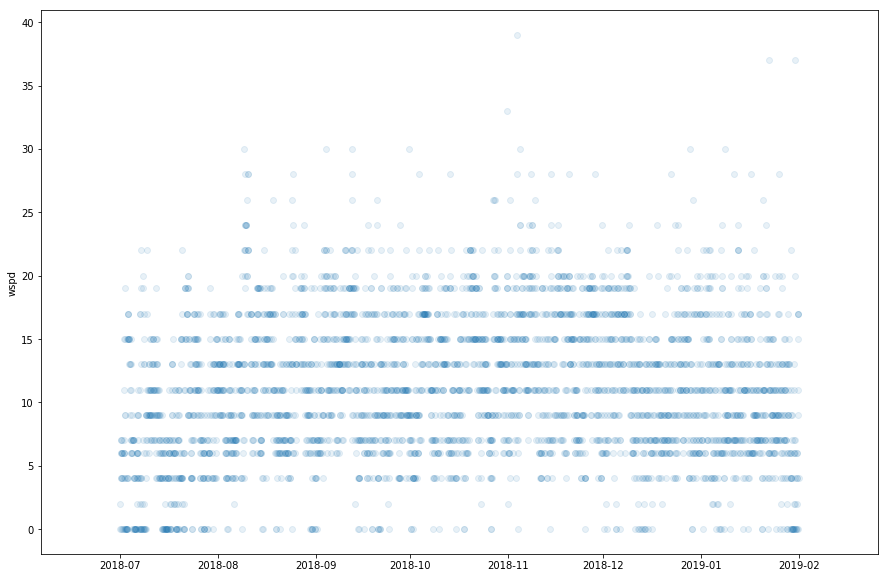

In [17]:
for c in consider_only:
    print('---', c)
    print('Min:', weather_raw[c].min())
    print('Max:', weather_raw[c].max())
    plt.figure(figsize=(15, 10))
    plt.ylabel(c)
    plt.scatter('valid_time_boston', c, data=weather_raw, alpha=0.1)
    plt.show()

Saving with raw data for testing :)
* No interpolating for now

In [18]:
weather_raw.rename(columns={'dewPt': 'dew_pt', 'valid_time_boston': 'time'}, inplace=True)
consider_only = [
    'time', 'dew_pt', 'feels_like', 'heat_index', 'precip_hrly',
    'rh', 'temp', 'vis', 'wc', 'wspd'
]
weather_raw[consider_only].to_csv(data_folder + 'processing/weather.csv', index=False)